In [1]:
%matplotlib inline

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

#mpl.rc('text', usetex=False)

In [4]:
ls ../Data/

College-Majors/                      bird.png                             gpa_data.csv
Emails/                              color_bird.png                       individual_physical_attributes.csv
Lyrics/                              credit_delinquency.csv               individual_physical_attributes.xlsx
New-Roster/                          die_series.dat                       pandas_test_data.csv
Roster/                              exceldata.xlsx                       smiley.gif
TA_ages.json                         gauss.dat
aapl_stock_price.csv                 gauss_too.dat


In [175]:
images = glob.glob('../Data/Paintings/*.jpg')

TypeError: Image data can not convert to float

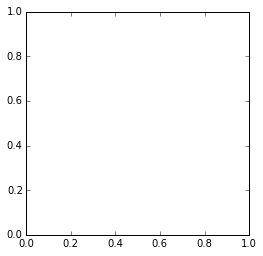

In [177]:
images[0]

## Script used for Scraping Picasso Paintings
### Remove later

In [171]:
import re

import requests

# Beautiful Soup version 4.x
import bs4
import urllib
# ipython notebook-specific library to display images and other media inline
from IPython.display import display, Image

# ipython notebook-specific library to render HTML code
from IPython.display import HTML

In [167]:
def grab_img(extn, i=0):
    base_page = 'http://www.abcgallery.com/'
    savedir = '/Users/peterwinter/Code/bootcamp/Data/Paintings/'
    
    r2 = requests.get(base_page + extn)
    soup2 = bs4.BeautifulSoup(r2.content)
    
    # grab info
    p = soup2.find('p').text
    author, title, description = p.split('\n')
    year = description[:4]
    

    
    extn2 = extn.replace('html', 'JPG')
    print(base_page + extn2)
    r = requests.get(base_page + extn2, stream=True)
    
    title = title.strip().replace(' ', '_')
    savename = '{y}-{t}-{i}.jpg'.format(y=year, t=title, i=i)
    i = i+1
    print(savename)
    path = savedir + savename
    path = path.replace('..', '.')
    print(path)
    
    if r.status_code == 200:
        with open(path, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)    
    else:
        print(r.status_code)
    return i

# extn = 'P/picasso/picasso72.html'
# grab_img(extn)
# #data = grab_img

def download_all_links(links):
    missing_links = []
    links_to_do = list(set(links) - set(done_links))
    i = 0
    for link in links_to_do:
        print(link)
        i += 1
        try:
            grab_img(extn=link, i=i)
            done_links.append(link)
            print(link, 'done')
        except:
            print('missed:\n', link)
            missing_links.append(link)
    return missing_links

def grab_page(page):
    r = requests.get(page)
    soup = bs4.BeautifulSoup(r.content)

    links = soup.findAll('a')
    #print(links)
    paintings = []
    for l in links:
        attrs = l.attrs
        if 'title' in attrs:
            title = attrs['title']
            if 'Pablo Picasso.' in title:
                title = title.split('Pablo Picasso.')[1].strip()
                paintings.append({'href':attrs['href'], 'title':title})
    link_df = pd.DataFrame(paintings)
    links = list(set(list(link_df['href'])))
    print(len(links), 'links')
    print(links)
    done_links = [] #'P/picasso/picasso72.html']
    missing = download_all_links(links)
    print(missing)
    
page = 'http://www.abcgallery.com/P/picasso/picasso-8.html'
grab_page(page)

15 links
['/P/picasso/picasso164.html', '/P/picasso/picasso169.html', '/P/picasso/picasso70.html', '/P/picasso/picasso165.html', '/P/picasso/picasso167.html', '/P/picasso/picasso162.html', '/P/picasso/picasso212.html', '/P/picasso/picasso208.html', '/P/picasso/picasso170.html', '/P/picasso/picasso213.html', '/P/picasso/picasso65.html', '/P/picasso/picasso163.html', '/P/picasso/picasso64.html', '/P/picasso/picasso168.html', '/P/picasso/picasso216.html']
/P/picasso/picasso164.html
http://www.abcgallery.com//P/picasso/picasso164.JPG
 Oil-Jacqueline_de_Vauvenargues.-1.jpg
/Users/peterwinter/Code/bootcamp/Data/Paintings/ Oil-Jacqueline_de_Vauvenargues.-1.jpg
/P/picasso/picasso164.html done
/P/picasso/picasso169.html
http://www.abcgallery.com//P/picasso/picasso169.JPG
1960-Portrait_of_a_Sitting_Woman.-2.jpg
/Users/peterwinter/Code/bootcamp/Data/Paintings/1960-Portrait_of_a_Sitting_Woman.-2.jpg
/P/picasso/picasso169.html done
/P/picasso/picasso70.html
http://www.abcgallery.com//P/picasso/pica